# Data Pipeline Integration and Splitting
This notebook integrates the complete data pipeline including cleaning, OCR, and feature engineering, then performs stratified train-validation-test splits.

In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
import sys, os
sys.path.append("..")
from scripts.data_pipeline import (
    integrate_pipeline, stratified_split,
    validate_splits, dataset_summary
)

In [8]:
# 1. Load cleaned dataset
df = pd.read_csv("../data/processed/heart_disease_features.csv")
print(f"Loaded dataset shape: {df.shape}")
print(f"Columns: {list(df.columns)}")
df.head()

Loaded dataset shape: (920, 23)
Columns: ['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca', 'num', 'risk_score', 'sex_Male', 'cp_atypical angina', 'cp_non-anginal', 'cp_typical angina', 'restecg_normal', 'restecg_st-t abnormality', 'slope_flat', 'slope_upsloping', 'thal_normal', 'thal_reversable defect', 'fbs_True', 'exang_True', 'age_group_Middle-aged', 'age_group_Senior', 'age_group_Young']


,age,trestbps,chol,thalch,oldpeak,ca,num,risk_score,sex_Male,cp_atypical angina,...,restecg_st-t abnormality,slope_flat,slope_upsloping,thal_normal,thal_reversable defect,fbs_True,exang_True,age_group_Middle-aged,age_group_Senior,age_group_Young
0,63.0,0.755400,0.273889,150.0,2.3,0.0,0.0,197.8,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,67.0,1.628081,0.842068,108.0,1.5,2.7,2.0,235.6,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
2,67.0,-0.699068,0.231008,129.0,2.6,2.0,1.0,185.4,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,37.0,-0.117281,0.456135,187.0,3.5,0.0,0.0,202.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,41.0,-0.117281,-0.037002,172.0,1.4,0.0,0.0,174.4,0.0,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [9]:
# 2. Integrate complete data pipeline (cleaning, OCR, feature engineering)
df_processed = integrate_pipeline(df)
print(f"✅ Pipeline integration complete")
print(f"Processed dataset shape: {df_processed.shape}")
print(f"New columns added: {df_processed.shape[1] - df.shape[1]}")
df_processed.head()

KeyError: 'cp'

In [ ]:
# 3. Stratified train-validation-test split (70%-15%-15%)
X_train, X_val, X_test, y_train, y_val, y_test = stratified_split(df_processed, target_col="num")
print(f"✅ Stratified splitting complete")
print(f"Training set shape: X={X_train.shape}, y={y_train.shape}")
print(f"Validation set shape: X={X_val.shape}, y={y_val.shape}")
print(f"Test set shape: X={X_test.shape}, y={y_test.shape}")

✅ Stratified splitting complete
Training set shape: X=(644, 19), y=(644,)
Validation set shape: X=(138, 19), y=(138,)
Test set shape: X=(138, 19), y=(138,)


In [ ]:
# 4. Validate splits
validation_results = validate_splits(X_train, X_val, X_test, y_train, y_val, y_test)
print("✅ Split validation complete")
print("Validation results:")
if isinstance(validation_results, dict):
    for key, value in validation_results.items():
        print(f"  {key}: {value}")
else:
    print(validation_results)

Train target distribution:
 num
0.0    0.447205
1.0    0.287267
2.0    0.118012
3.0    0.116460
4.0    0.031056
Name: proportion, dtype: float64
Validation target distribution:
 num
0.0    0.442029
1.0    0.289855
2.0    0.123188
3.0    0.115942
4.0    0.028986
Name: proportion, dtype: float64
Test target distribution:
 num
0.0    0.449275
1.0    0.289855
3.0    0.115942
2.0    0.115942
4.0    0.028986
Name: proportion, dtype: float64
Train set: No missing values
Validation set: No missing values
Test set: No missing values
✅ Split validation complete
Validation results:
None


In [ ]:
# 5. Generate final dataset summary
summary_stats = dataset_summary(df_processed)
print("✅ Dataset summary generated")
print("\n=== DATASET SUMMARY ===")
print(summary_stats)

✅ Dataset summary generated

=== DATASET SUMMARY ===
                                       Feature      Type  Missing  Unique  \
age                                        age   float64        0      50   
age_group                             trestbps  category        0       4   
ca                                        chol   float64        0      11   
chol                                       fbs   float64        0     229   
cp_atypical angina                     restecg   float64        0       2   
cp_non-anginal                          thalch   float64        0       2   
cp_typical angina                        exang   float64        0       2   
exang                                  oldpeak      bool        0       2   
fbs                                         ca      bool        0       2   
num                                        num   float64        0       5   
oldpeak                              age_group   float64        0      60   
restecg                

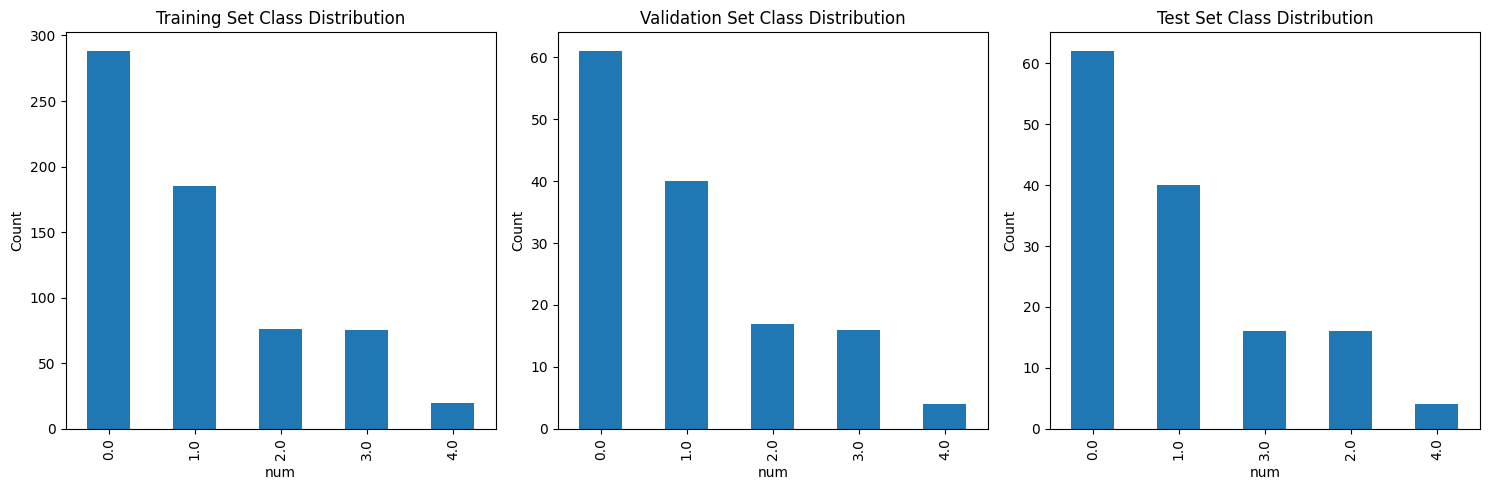

Class proportions:
Training:   num
0.0    0.447205
1.0    0.287267
2.0    0.118012
3.0    0.116460
4.0    0.031056
Name: proportion, dtype: float64
Validation: num
0.0    0.442029
1.0    0.289855
2.0    0.123188
3.0    0.115942
4.0    0.028986
Name: proportion, dtype: float64
Test:       num
0.0    0.449275
1.0    0.289855
2.0    0.115942
3.0    0.115942
4.0    0.028986
Name: proportion, dtype: float64


In [ ]:
# Visualize class distribution across splits
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Training set distribution
y_train.value_counts().plot(kind='bar', ax=axes[0], title='Training Set Class Distribution')
axes[0].set_ylabel('Count')

# Validation set distribution
y_val.value_counts().plot(kind='bar', ax=axes[1], title='Validation Set Class Distribution')
axes[1].set_ylabel('Count')

# Test set distribution
y_test.value_counts().plot(kind='bar', ax=axes[2], title='Test Set Class Distribution')
axes[2].set_ylabel('Count')

plt.tight_layout()
plt.show()

# Print proportions
print("Class proportions:")
print(f"Training:   {y_train.value_counts(normalize=True).sort_index()}")
print(f"Validation: {y_val.value_counts(normalize=True).sort_index()}")
print(f"Test:       {y_test.value_counts(normalize=True).sort_index()}")

In [ ]:
# 6. Save final datasets
# Create directory if it doesn't exist
import os
os.makedirs("../data/final", exist_ok=True)

# Save datasets with target column included
train_dataset = X_train.copy()
train_dataset['target'] = y_train
train_dataset.to_csv("../data/final/train_dataset.csv", index=False)

val_dataset = X_val.copy()
val_dataset['target'] = y_val
val_dataset.to_csv("../data/final/validation_dataset.csv", index=False)

test_dataset = X_test.copy()
test_dataset['target'] = y_test
test_dataset.to_csv("../data/final/test_dataset.csv", index=False)

print("✅ Data splitting and integration testing complete. Final datasets saved.")
print(f"Files saved:")
print(f"  - train_dataset.csv: {train_dataset.shape}")
print(f"  - validation_dataset.csv: {val_dataset.shape}")
print(f"  - test_dataset.csv: {test_dataset.shape}")

✅ Data splitting and integration testing complete. Final datasets saved.
Files saved:
  - train_dataset.csv: (644, 20)
  - validation_dataset.csv: (138, 20)
  - test_dataset.csv: (138, 20)


In [ ]:
# Final verification - load and check saved datasets
print("=== FINAL VERIFICATION ===")

# Load saved datasets
train_check = pd.read_csv("../data/final/train_dataset.csv")
val_check = pd.read_csv("../data/final/validation_dataset.csv")
test_check = pd.read_csv("../data/final/test_dataset.csv")

print(f"Loaded train dataset: {train_check.shape}")
print(f"Loaded validation dataset: {val_check.shape}")
print(f"Loaded test dataset: {test_check.shape}")

# Check for data integrity
total_samples = len(train_check) + len(val_check) + len(test_check)
original_samples = len(df_processed)

print(f"\nData integrity check:")
print(f"Original dataset size: {original_samples}")
print(f"Total saved samples: {total_samples}")
print(f"Match: {'✅ Yes' if total_samples == original_samples else '❌ No'}")

# Check target distribution
print(f"\nTarget distribution in saved datasets:")
print(f"Train: {train_check['target'].value_counts().sort_index().to_dict()}")
print(f"Val:   {val_check['target'].value_counts().sort_index().to_dict()}")
print(f"Test:  {test_check['target'].value_counts().sort_index().to_dict()}")

print("\n Pipeline integration and data splitting completed successfully!")

=== FINAL VERIFICATION ===
Loaded train dataset: (644, 20)
Loaded validation dataset: (138, 20)
Loaded test dataset: (138, 20)

Data integrity check:
Original dataset size: 920
Total saved samples: 920
Match: ✅ Yes

Target distribution in saved datasets:
Train: {0.0: 288, 1.0: 185, 2.0: 76, 3.0: 75, 4.0: 20}
Val:   {0.0: 61, 1.0: 40, 2.0: 17, 3.0: 16, 4.0: 4}
Test:  {0.0: 62, 1.0: 40, 2.0: 16, 3.0: 16, 4.0: 4}

 Pipeline integration and data splitting completed successfully!


In [ ]:
# --- Model Training & Evaluation Metrics ---
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, f1_score, roc_auc_score,
    confusion_matrix, classification_report
)

# Train a baseline model (Random Forest here)
model = RandomForestClassifier(n_estimators=200, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_val_pred = model.predict(X_val)
y_test_pred = model.predict(X_test)

# Probabilities (for ROC-AUC)
y_val_prob = model.predict_proba(X_val)[:, 1]
y_test_prob = model.predict_proba(X_test)[:, 1]

# --- Validation Metrics ---
val_accuracy = accuracy_score(y_val, y_val_pred)
val_f1 = f1_score(y_val, y_val_pred)
val_roc = roc_auc_score(y_val, y_val_prob)

# --- Test Metrics ---
test_accuracy = accuracy_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)
test_roc = roc_auc_score(y_test, y_test_prob)

print("📊 Validation Set Metrics")
print(f"Accuracy: {val_accuracy:.4f}")
print(f"F1-Score: {val_f1:.4f}")
print(f"ROC-AUC:  {val_roc:.4f}")
print("\nConfusion Matrix:\n", confusion_matrix(y_val, y_val_pred))
print("\nClassification Report:\n", classification_report(y_val, y_val_pred))

print("\n📊 Test Set Metrics")
print(f"Accuracy: {test_accuracy:.4f}")
print(f"F1-Score: {test_f1:.4f}")
print(f"ROC-AUC:  {test_roc:.4f}")
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_test_pred))
print("\nClassification Report:\n", classification_report(y_test, y_test_pred))


ValueError: could not convert string to float: 'normal'